In [11]:
#Enable src/ as importable package
import sys
import os

# Add the src/ directory to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)


In [12]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_preparation.preprocess import load_oil_data, load_event_data

sns.set(style='whitegrid', palette='muted')


In [16]:
# Cell 2: Load Data
oil_df = load_oil_data("../data/raw/brent_oil_prices.csv")
events_df = load_event_data("../data/processed/events.csv")


In [17]:
# Cell 3: Preview Data
display(oil_df.head())
display(events_df.head())


,Date,Price,LogReturn
0,1987-05-21,18.45,-0.009709
1,1987-05-22,18.55,0.005405
2,1987-05-25,18.60,0.002692
3,1987-05-26,18.63,0.001612
4,1987-05-27,18.60,-0.001612


,Date,Event_Description,Event_Type
0,1987-07-01,Iran-Iraq War tanker attacks disrupt Persian G...,Geopolitical
1,1990-08-02,"Iraq invades Kuwait, leading to Gulf War and o...",Geopolitical
2,2003-03-20,US invasion of Iraq disrupts oil production,Geopolitical
3,2008-09-15,Global financial crisis triggers oil demand co...,Economic
4,2011-02-15,Arab Spring and Libyan civil war reduce oil su...,Geopolitical


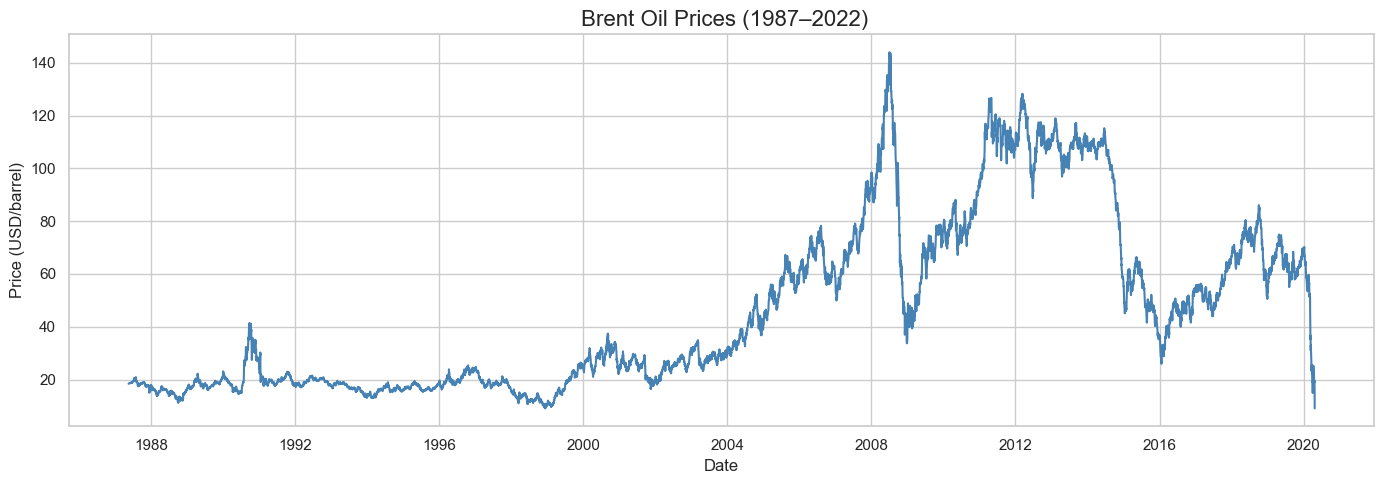

In [20]:
plt.figure(figsize=(14, 5))
plt.plot(oil_df['Date'], oil_df['Price'], label='Price (USD)', color='steelblue')
plt.title(' Brent Oil Prices (1987–2022)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig("../results/figures/brent_price_trend.png", dpi=300)
plt.show()


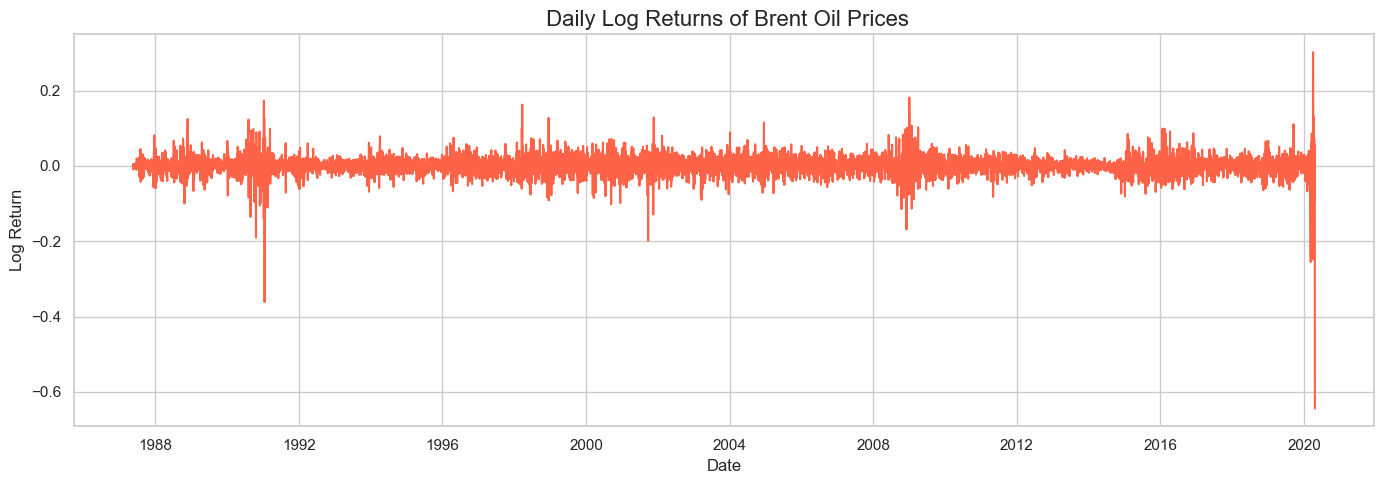

In [22]:
plt.figure(figsize=(14, 5))
plt.plot(oil_df['Date'], oil_df['LogReturn'], color='tomato')
plt.title(' Daily Log Returns of Brent Oil Prices', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.tight_layout()

# Save plot
plt.savefig("../results/figures/log_returns.png", dpi=300)
plt.show()


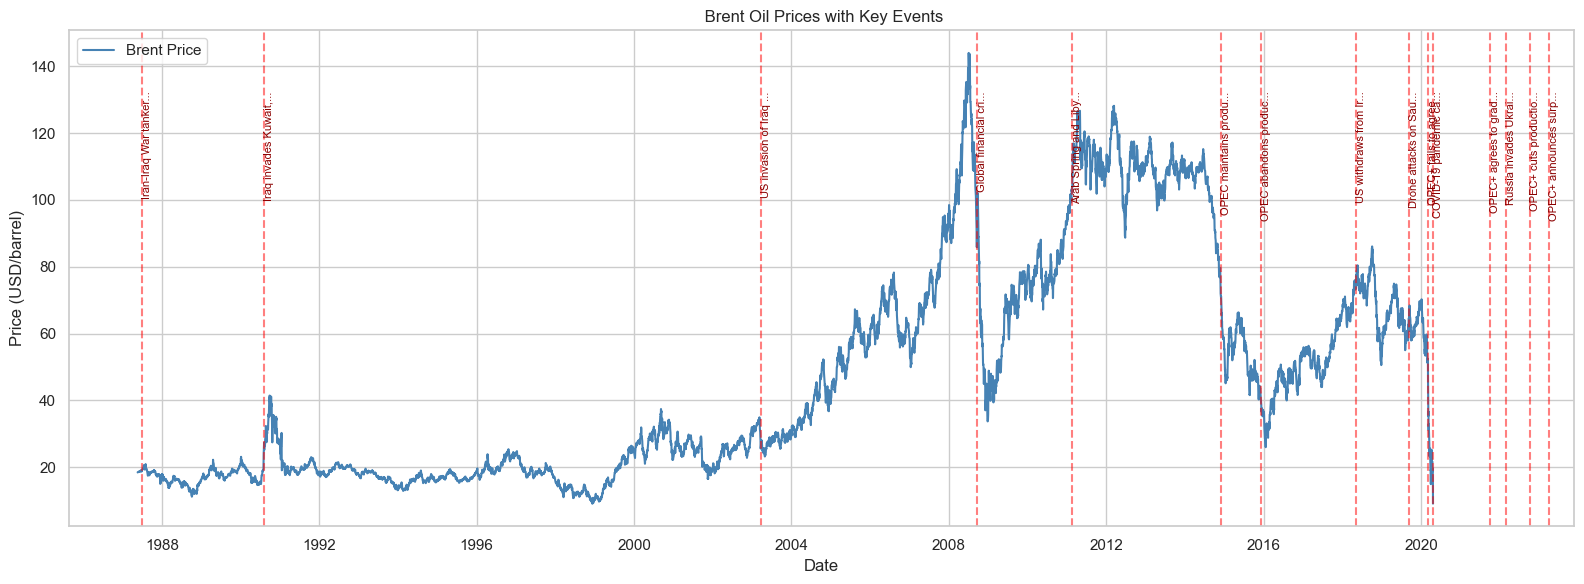

In [24]:
plt.figure(figsize=(16, 6))
plt.plot(oil_df['Date'], oil_df['Price'], label='Brent Price', color='steelblue')

for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.5)
    plt.text(
        row['Date'],
        oil_df['Price'].max() * 0.92,
        row['Event_Description'][:20] + '...',
        rotation=90,
        fontsize=8,
        color='darkred',
        verticalalignment='top'
    )

plt.title(' Brent Oil Prices with Key Events')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.tight_layout()

# Save plot
plt.savefig("../results/figures/price_with_events.png", dpi=300)
plt.show()
